https://trainings.analyticsvidhya.com/courses/course-v1:AnalyticsVidhya+TS_101+TS_term1/course/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')

In [3]:
train_original=train.copy()
test_original=test.copy()
# train_original=train[:]
# test_original=test[:]

In [4]:
train.columns,test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [5]:
train.dtypes,test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

In [6]:
train.shape,test.shape

((18288, 3), (5112, 2))

In [7]:
train['Datetime']=pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
test['Datetime']=pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')
train_original['Datetime']=pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')
test_original['Datetime']=pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M')

In [8]:
train.dtypes,test.dtypes

(ID                   int64
 Datetime    datetime64[ns]
 Count                int64
 dtype: object, ID                   int64
 Datetime    datetime64[ns]
 dtype: object)

In [9]:
for i in (train,test,train_original,test_original):
    i['year']=i.Datetime.dt.year
    i['month']=i.Datetime.dt.month
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour

In [10]:
train['day of week']=train['Datetime'].dt.dayofweek
temp=train['Datetime']

In [11]:
temp2=train['Datetime'].apply(lambda row:1 if row.dayofweek in range(5,7) else 0)
train['weekend']=temp2

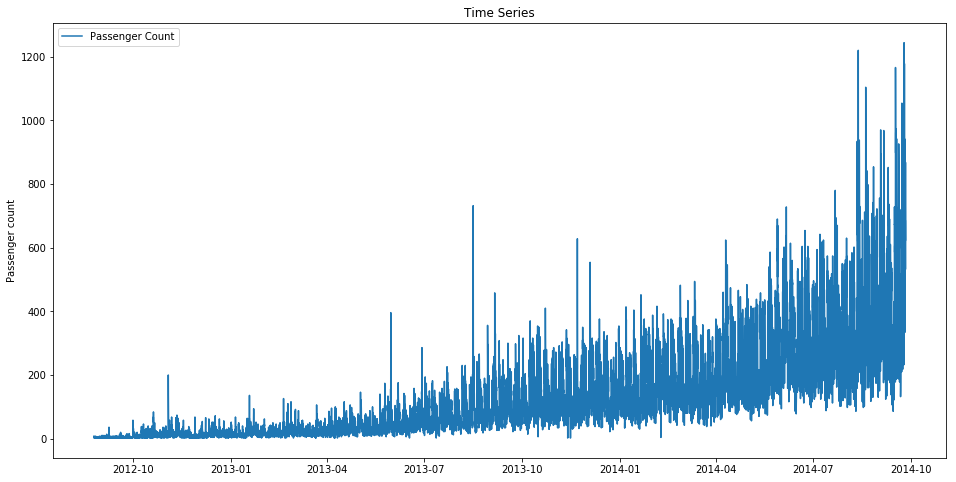

In [12]:
#indexing the datetime to get the time perios on the x-axis
train.index=train['Datetime']
#drop ID variable to get only the Datetime on x-axis
df=train.drop('ID',1)
ts=df['Count']
#after mark Datetime as index,ts contain is by defauly,so need to picking
#it explicitly,we should got it when getting Count column,because index 
#column always should be the with data,eith 1 column or more
plt.figure(figsize=(16,8))
plt.plot(ts,label='Passenger Count')
plt.title('Time Series')
plt.xlabel=('Time(year-month)')
plt.ylabel('Passenger count')
plt.legend(loc='best')

In [13]:
#simply do this
# plt.figure(figsize=(16,8))
# plt.plot(train['Datetime'],train['Count'])

## Exploratory Analysis

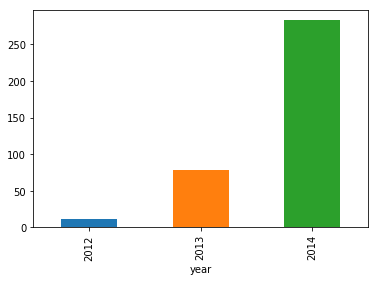

In [14]:
train.groupby('year')['Count'].mean().plot.bar()

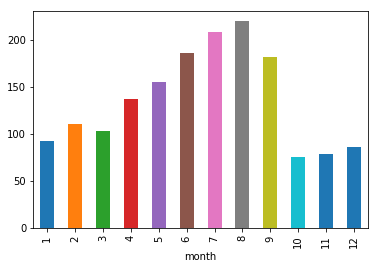

In [15]:
train.groupby('month')['Count'].mean().plot.bar()

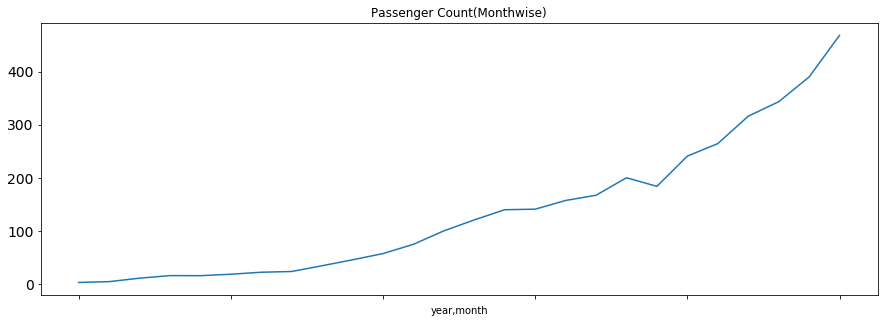

In [16]:
temp=train.groupby(['year','month'])['Count'].mean()
temp.plot(figsize=(15,5),title='Passenger Count(Monthwise)',fontsize=14)

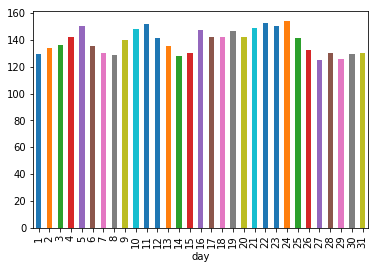

In [17]:
train.groupby('day')['Count'].mean().plot.bar()

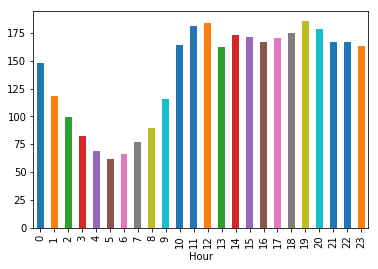

In [18]:
train.groupby('Hour')['Count'].mean().plot.bar()

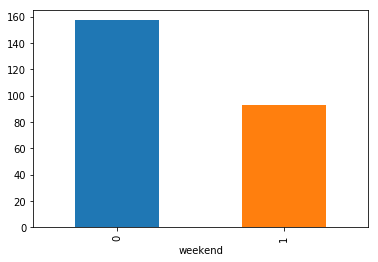

In [19]:
train.groupby('weekend')['Count'].mean().plot.bar()

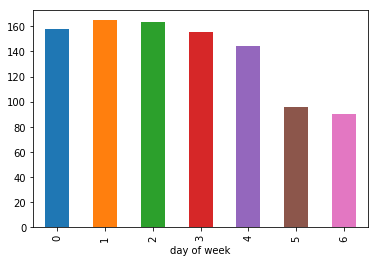

In [20]:
train.groupby('day of week')['Count'].mean().plot.bar()

In [21]:
train=train.drop('ID',1)

In [22]:
train.Timestamp=pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.index=train.Timestamp

In [23]:
train.columns

Index(['Datetime', 'Count', 'year', 'month', 'day', 'Hour', 'day of week',
       'weekend'],
      dtype='object')

In [24]:
#hourly time series
hourly=train.resample('H').mean()

#converting to daily mean
daily=train.resample('D').mean()

#converting to weekly mean
weekly=train.resample('W').mean()

#converting to monthly mean
monthly=train.resample('M').mean()

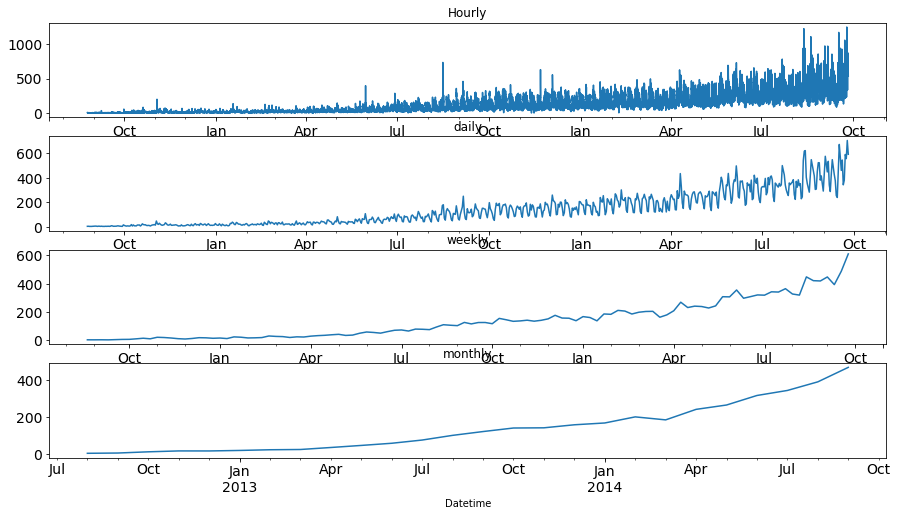

In [25]:
fig, axs=plt.subplots(4,1)

hourly.Count.plot(figsize=(15,8),title='Hourly',fontsize=14,ax=axs[0])
daily.Count.plot(figsize=(15,8),title='daily',fontsize=14,ax=axs[1])
weekly.Count.plot(figsize=(15,8),title='weekly',fontsize=14,ax=axs[2])
monthly.Count.plot(figsize=(15,8),title='monthly',fontsize=14,ax=axs[3])

plt.show()

In [26]:
test.Timestamp=pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')
test.index=test.Timestamp

#converting to daily mean
test=test.resample('D').mean()

train.Timestamp=pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.index=train.Timestamp

#converting to daily mean
train=train.resample('D').mean()

## splitting the data intro training and validation part

In [27]:
Train=train.loc['2012-08-25':'2014-06-24']
valid=train.loc['2014-06-25':'2014-09-25']

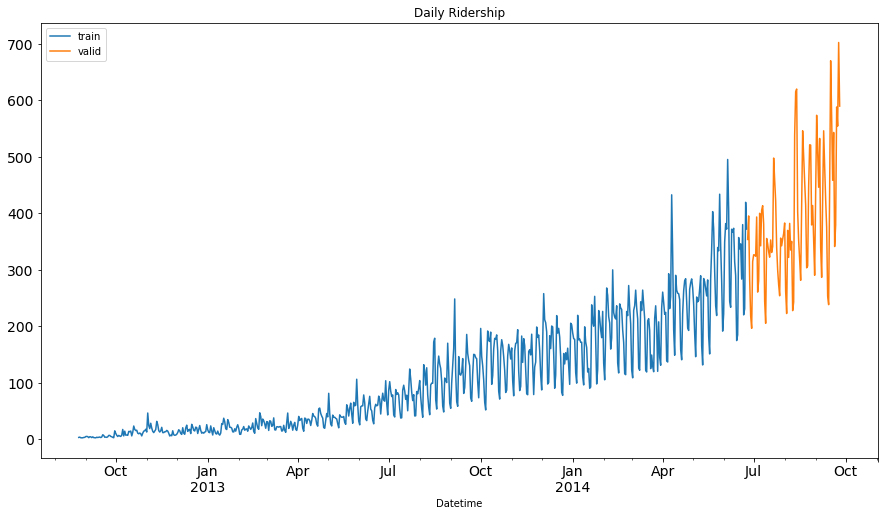

In [41]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train')
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid')
# plt.xlabel("Datetime")
# plt.ylabel("Passenger count")
plt.legend(loc='best')
plt.show()

# modeling techniques